In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df_train=pd.read_csv("./MNIST_train.csv")


In [60]:
df_train.head()
df_train.shape

(60000, 787)

In [61]:
df_train.isnull().sum()

Unnamed: 0    0
index         0
labels        0
0             0
1             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 787, dtype: int64

In [62]:
missing_values=["NA","n/a","--","","N/A","na","None","none","NONE","n.a.","?"]
df_train = pd.read_csv("./MNIST_train.csv", na_values=missing_values)


In [63]:
df_train.isnull().sum()

Unnamed: 0    0
index         0
labels        0
0             0
1             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 787, dtype: int64

In [64]:
X= df_train.to_numpy()
y=X[:,2]

In [65]:
X=X[:,3:]
X.shape
#y=X[:,2:3]
#y=df_train["labels"].to_numpy()
#y.shape
#print(y)

(60000, 784)

In [66]:
print(y)
y.shape

[5 0 4 ... 5 6 8]


(60000,)

In [ ]:
X= X.reshape((60000, 28, 28))


##x_train_reshaped=np.reshape(x_train,(60000, 28, 28))

ValueError: ignored

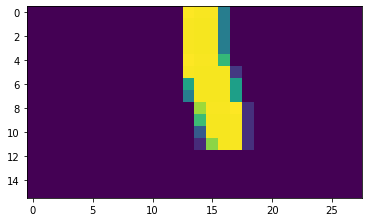

In [ ]:
#img= X[0].reshape((28,28))
plt.imshow(X[6])

In [46]:
##improve method to not recognize weight and height independent variables

from scipy.stats import multivariate_normal as mvn ##distribution

class GaussNB():
  def fit(self,X,y,epsilon=1e-3):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))
    for k in self.K:
      X_k=X[y==k,:]
      self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+ epsilon} ###adding eplison for not having devision of zero
      self.priors[k]=len(X_k)/len(X) ## =Nk/N , assume p(y)~1

  def predict(self,X):
    N, D= X.shape
    P_hat= np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items(): ###learning skews and mean
      P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"], allow_singular=True)+np.log(self.priors[k]) ##mvn assume the distributtion is Normal
    return P_hat.argmax(axis=1)


In [47]:
gnb= GaussNB()

In [18]:
gnb.fit(X,y)

In [19]:
##train accuaracy
y_hat=gnb.predict(X)

In [20]:
##define accuaracy
def accuaracy(y,y_hat):
  return np.mean(y==y_hat)

In [21]:
accuaracy(y,y_hat)

0.5938

In [22]:
###we assume to have Normal distributions
#New sigma_sub_k:
#$\sigma_k =\frac
class GaussBayes():
  def fit(self ,X,y,epsilon=1e-3):
    self.likelihoods =dict()
    self.priors=dict()
    self.K =set(y.astype(int))
  
    for k in self.K:
      X_k=X[y==k,:]
      N_k, D= X_k.shape
      mu_k=X_k.mean(axis=0)
    ##populate likilood
      self.likelihoods[k]={'mean': X_k.mean(axis=0),'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+ epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):

    N,D = X.shape
    P_hat = np.zeros((N,len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:,k]= mvn.logpdf(X,l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [23]:
gbayes=GaussBayes()

In [24]:
gbayes.fit(X,y)

In [25]:
y_hat_GB=gbayes.predict(X)

In [26]:
##define accuaracy
def accuaracy(y,y_hat_GB):
  return np.mean(y==y_hat_GB)

In [27]:
accuaracy(y,y_hat_GB)

0.78565

In [28]:
####Classifiers
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [97]:
##build classifier()
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self, X, K, epsilon=1e-3):
        N=len(X)
        y_hat= np.zeros(N)
        ## find distance and measure distance of each points
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt =np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt])+ epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [98]:
Knn= KNNClassifier()
Knn.fit(X,y)

In [31]:
y_hat_KNN=Knn.predict(X,5)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [48]:
##define accuaracy
def accuaracy(y,y_hat_KNN):
  return np.mean(y==y_hat_KNN)

In [49]:
accuaracy(y,y_hat_KNN)

<ipython-input-48-6d5c3ad9cb3c>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(y==y_hat_KNN)


0.0

In [80]:
df_test=pd.read_csv('./MNIST_test.csv')
df_test.shape

(10000, 787)

In [82]:
X1=df_test.to_numpy()
X1.shape

(10000, 787)

In [83]:
y1=X1[:,2]


In [84]:
X1=X1[:,3:]
X1.shape

(10000, 784)

In [85]:
y1_hat_KNN=Knn.predict(X1,5)

In [86]:
def accuracy(y1,y1_hat_KNN):
    return np.mean(y1==y1_hat_KNN)
    

In [87]:
accuracy(y1, y1_hat_KNN)

0.9691

In [125]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Compute confusion matrix
cm=confusion_matrix(y_true=y1, y_pred=y1_hat_KNN)


[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    7  989    2    0    0    2   17    4    0]
 [   0    2    3  973    1   13    1    7    4    6]
 [   2    7    0    0  943    0    4    3    0   23]
 [   4    0    0    9    2  861    6    1    4    5]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   20    4    0    3    0    0  990    0   11]
 [   7    3    5   12    5   11    5    5  916    5]
 [   3    5    3    7    7    3    1   11    2  967]]


In [122]:
"""
om sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Compute confusion matrix
cnf_matfusion_matrix(y_true=y1, y_pred=y1_hat_KNN)
#p.set_printoptions(precision=2)
# Plot normalized confusion matrix
#lt.figure()
print(cnf_matrix)
"""

'\nom sklearn.metrics import classification_report,confusion_matrix\nfrom sklearn.metrics import plot_confusion_matrix\n# Compute confusion matrix\ncnf_matfusion_matrix(y_true=y1, y_pred=y1_hat_KNN)\n#p.set_printoptions(precision=2)\n# Plot normalized confusion matrix\n#lt.figure()\nprint(cnf_matrix)\n'

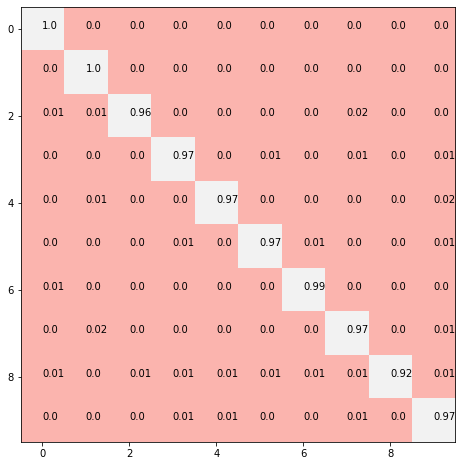

In [157]:

cm = np.round (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(cm, cmap=plt.cm.Pastel1)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show(block=False)
for i in range(10):
    for j in range(10):
        plt.text(j,i, str(cm[i][j]))

plt.savefig("./ConfusionMatricsTestSetKNN.png" , dpi=150)
plt.show()